In [1]:
import sys
from os.path import join, exists, abspath
from os import getcwd
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm, colors
import scipy
import seaborn as sns

from tqdm import tqdm

In [2]:
import nibabel as nb
# import nitools as nt
from nilearn.plotting import plot_surf

In [3]:
# np.set_printoptions(linewidth=20)

In [4]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

---

In [5]:
dir_current = getcwd()

list_ = []
for ii, dname in enumerate(dir_current.split('\\')[:-3]):
    if ii==0:
        tmp = dname+'/'
    else:
        tmp = dname
    list_.append(tmp)
dir_git = join(*list_)
dir_git

'D:/mobaxterm\\sungbeenpark\\github'

In [6]:
dir_work = join(dir_git,'diedrichsenlab/SeqSpatialSupp_fMRI')
exists(dir_work)

True

In [7]:
path_module = abspath(join(dir_git,'nitools'))
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import nitools as nt

added the path, D:\mobaxterm\sungbeenpark\github\nitools


In [8]:
path_module = abspath(join(dir_git,'SUITPy'))
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import SUITPy as suit

added the path, D:\mobaxterm\sungbeenpark\github\SUITPy


In [9]:
path_module = abspath(join(dir_git))
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import surfAnalysisPy as surf

added the path, D:\mobaxterm\sungbeenpark\github


In [10]:
list_subj_S = ['S%02d'%i for i in [1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14]]
list_subj_R = ['R%02d'%i for i in [1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14]]
list_subj = list_subj_S + list_subj_R
list_subj

['S01',
 'S02',
 'S03',
 'S05',
 'S06',
 'S08',
 'S09',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'R01',
 'R02',
 'R03',
 'R05',
 'R06',
 'R08',
 'R09',
 'R10',
 'R11',
 'R12',
 'R13',
 'R14']

---

## Pattern

In [11]:
dir_pattern = join('D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns')
print(glob(join(dir_pattern, '*_fRDM.glm3.mat')))
exists(dir_pattern)

['D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\R01_fRDM.glm3.mat', 'D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\R02_fRDM.glm3.mat', 'D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\R03_fRDM.glm3.mat', 'D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\R05_fRDM.glm3.mat', 'D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\R06_fRDM.glm3.mat', 'D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\R08_fRDM.glm3.mat', 'D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\R09_fRDM.glm3.mat', 'D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\R10_fRDM.glm3.mat', 'D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\R12_fRDM.glm3.mat', 'D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\R14_fRDM.glm3.mat', 'D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\S01_fRDM.glm3.mat', 'D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\S02_fRDM.glm3.mat', 'D:/milli/diedrichsenlab/SeqSpatialSupp_fMRI/patterns\\S03_fRDM.glm3.mat', 'D:/milli/diedrichsenlab

True

- ROIs:
    1. SMA
    2. PMv
    3. PMd
    4. M1
    5. S1
    6. SPLa
    7. SPLd
    8. DSVC
    9. MT+
    10. VSVC
    11. EAC
- State: $(s,c)$, where $s$ is sequence, $c$ is cue.
    1. $s$ :
        - 13254
        - 14523
        - 32451
        - 35124
    2. $c$ :
        - letter
        - spatial

|     |(0,0)|(0,1)|(1,0)|(1,1)|(2,0)|(2,1)|(3,0)|(3,1)| 
|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|(0,0)|  B  |     |     |     |     |     |     |     |
|(0,1)|  S00  |  B  |     |     |     |     |     |     |
|(1,0)|  C01  |  N07  |  B  |     |     |     |     |     |
|(1,1)|  N02  |  C08  |  S13  |  B  |     |     |     |     |
|(2,0)|  C03  |  N09  |  C14  |  N18  |  B  |     |     |     |
|(2,1)|  N04  |  C10  |  N15  |  C19  |  S22  |  B  |     |     |
|(3,0)|  C05  |  N11  |  C16  |  N20  |  C23  |  N25  |  B  |     |
|(3,1)|  N06  |  C12  |  N17  |  C21  |  N24  |  C26  |  S27  |  B  |

$$\downarrow$$

|     |(0,0)|(1,0)|(2,0)|(3,0)|(0,1)|(1,1)|(2,1)|(3,1)| 
|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|(0,0)|  B  |  C01  |  C03  |  C05  |  S00  |  N02  |  N04  |  N06  |
|(1,0)|     |  B  |  C14  |  C16  |  N07  |  S13  |  N15  |  N17  |
|(2,0)|     |     |  B  |  C23  |  N09  |  N18  |  S22  |  N24  |
|(3,0)|     |     |     |  B  |  N11  |  N20  |  N25  |  S27  |
|(0,1)|     |     |     |     |  B  |  C08  |  C10  |  C12  |
|(1,1)|     |     |     |     |     |  B  |  C19  |  C21  |
|(2,1)|     |     |     |     |     |     |  B  |  C26  |
|(3,1)|     |     |     |     |     |     |     |  B  |

In [12]:
idx_RDM = np.array([
    1, 3, 5, 0, 2, 4, 6,
    14, 16, 7, 13, 15, 17,
    23, 9, 18, 22, 24,
    11, 20, 25, 27,
    8, 10, 12,
    19, 21,
    26
])

$$RDM = \begin{bmatrix}
\textcolor{gray}{B} & C & C & C & S & N & N & N \\
C & \textcolor{gray}{B} & C & C & N & S & N & N \\
C & C & \textcolor{gray}{B} & C & N & N & S & N \\
C & C & C & \textcolor{gray}{B} & N & N & N & S \\
S & N & N & N & \textcolor{gray}{B} & C & C & C \\
N & S & N & N & C & \textcolor{gray}{B} & C & C \\
N & N & S & N & C & C & \textcolor{gray}{B} & C \\
N & N & N & S & C & C & C & \textcolor{gray}{B}
\end{bmatrix}$$
The number of elements on the upper triangle $= \frac{8\cdot 7}{2} = 28$
- B: both of cue and sequence repetition (8 trials)
- S: only sequence repetition (8 trials)
- C: only cue repetition (24 trials)
- N: no repetition (24 trials)

In [13]:
RDM = np.array([
    'C', 'C', 'C', 'S', 'N', 'N', 'N',
         'C', 'C', 'N', 'S', 'N', 'N',
              'C', 'N', 'N', 'S', 'N',
                   'N', 'N', 'N', 'S',
                        'C', 'C', 'C',
                             'C', 'C',
                                  'C'
])

In [14]:
list_var = ['beta', 'glm', 'subj', 'nvoxels', 'ROI', 'normmode', 'RDM',]

subj = 'S01' ## -> ss
data = scipy.io.loadmat(join(dir_pattern,'%s_fRDM.glm3.mat'%subj))['Data']
for i, dd in enumerate(data[0,0]):
    print('i=%d: %s - %s'%(i,dd.shape,list_var[i]))
betas = data[0,0][0][:,0]
nvoxels = data[0,0][3][:,0]
rois = data[0,0][4][:,0]
rdms = data[0,0][6][:,0]

i=0: (11, 1) - beta
i=1: (22, 1) - glm
i=2: (22, 1) - subj
i=3: (22, 1) - nvoxels
i=4: (22, 1) - ROI
i=5: (11,) - normmode
i=6: (11, 1) - RDM


In [15]:
list_diss = []

for ss, subj in enumerate(list_subj):
    group = subj[0]
    fname = join(dir_pattern,'%s_fRDM.glm3.mat'%subj)
    if not exists(fname):
        continue
    data = scipy.io.loadmat(fname)['Data'][0,0]
    betas = data[0][:,0]
    nvoxels = data[3][:,0]
    rois = data[4][:,0]
    rdms = data[6][:,0]
    for rr, roi_ in enumerate(rois[:11]):
        roi = str(roi_[0])[4:-2]
        # print(roi)
        
        rdm = rdms[rr][0]
        rdm_ordered = rdm[idx_RDM].copy()

        list_diss.append({'group':group, 'subj':subj, 'roi':roi, 'diss':'sameSeq_across', 'mean':rdm_ordered[np.where(RDM=='S')[0]].mean()})
        list_diss.append({'group':group, 'subj':subj, 'roi':roi, 'diss':'diffSeq_across', 'mean':rdm_ordered[np.where(RDM=='N')[0]].mean()})
        
        tmp = np.where(RDM=='C')[0];
        list_diss.append({'group':group, 'subj':subj, 'roi':roi, 'diss':'diffSeq_within_L', 'mean':rdm_ordered[tmp[tmp<14]].mean()})
        list_diss.append({'group':group, 'subj':subj, 'roi':roi, 'diss':'diffSeq_within_S', 'mean':rdm_ordered[tmp[tmp>=14]].mean()})
        
        list_diss.append({'group':group, 'subj':subj, 'roi':roi, 'diss':'diffSeq_sameFing_within_L', 'mean':rdm_ordered[[0,13]].mean()})
        list_diss.append({'group':group, 'subj':subj, 'roi':roi, 'diss':'diffSeq_sameFing_within_S', 'mean':rdm_ordered[[22,27]].mean()})
        list_diss.append({'group':group, 'subj':subj, 'roi':roi, 'diss':'diffSeq_sameFing_across', 'mean':rdm_ordered[[4,9,17,20]].mean()})
        
        list_diss.append({'group':group, 'subj':subj, 'roi':roi, 'diss':'diffFing_within_L', 'mean':rdm_ordered[[1,2,7,8]].mean()})
        list_diss.append({'group':group, 'subj':subj, 'roi':roi, 'diss':'diffFing_within_S', 'mean':rdm_ordered[[23,24,25,26]].mean()})
        list_diss.append({'group':group, 'subj':subj, 'roi':roi, 'diss':'diffFing_across', 'mean':rdm_ordered[[5,6,11,12,14,15,18,19]].mean()})
        
        list_diss.append({'group':group, 'subj':subj, 'roi':roi, 'diss':'sameFing_across', 'mean':rdm_ordered[[3,4,9,10,16,17,20,21]].mean()})

In [16]:
df = pd.DataFrame(list_diss)
print(df.subj.unique())
df

['S01' 'S02' 'S03' 'S05' 'S06' 'S08' 'S09' 'S10' 'S11' 'S12' 'S13' 'S14'
 'R01' 'R02' 'R03' 'R05' 'R06' 'R08' 'R09' 'R10' 'R12' 'R14']


,group,subj,roi,diss,mean
0,S,S01,SMA,sameSeq_across,67.842349
1,S,S01,SMA,diffSeq_across,76.650954
2,S,S01,SMA,diffSeq_within_L,7.196836
3,S,S01,SMA,diffSeq_within_S,10.205476
4,S,S01,SMA,diffSeq_sameFing_within_L,-0.563379
...,...,...,...,...,...
2657,R,R14,EAC,diffSeq_sameFing_across,-2.441749
2658,R,R14,EAC,diffFing_within_L,-0.040054
2659,R,R14,EAC,diffFing_within_S,1.696998
2660,R,R14,EAC,diffFing_across,-0.268984


In [17]:
# list_diss = df.diss.unique()
list_diss = [
    'diffFing_within_L', 'diffFing_within_S', 'diffFing_across',
    'diffSeq_sameFing_within_L', 'diffSeq_sameFing_within_S', 'diffSeq_sameFing_across',
    'sameSeq_across'
]
list_diss

['diffFing_within_L',
 'diffFing_within_S',
 'diffFing_across',
 'diffSeq_sameFing_within_L',
 'diffSeq_sameFing_within_S',
 'diffSeq_sameFing_across',
 'sameSeq_across']

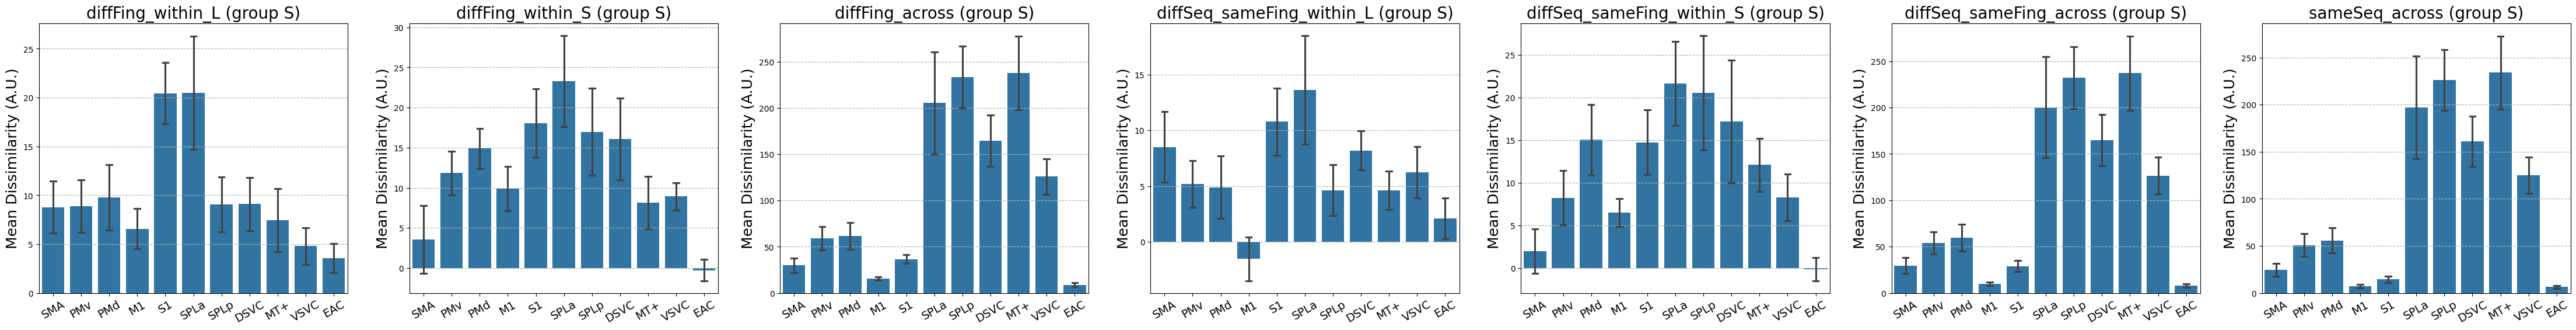

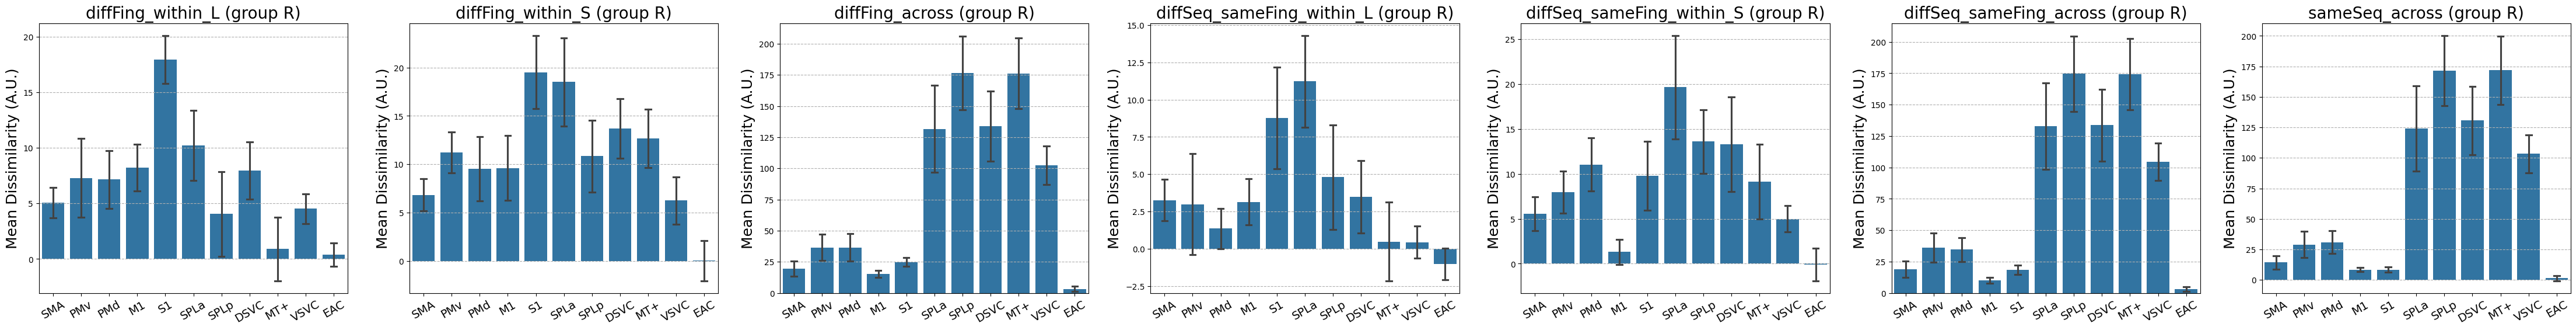

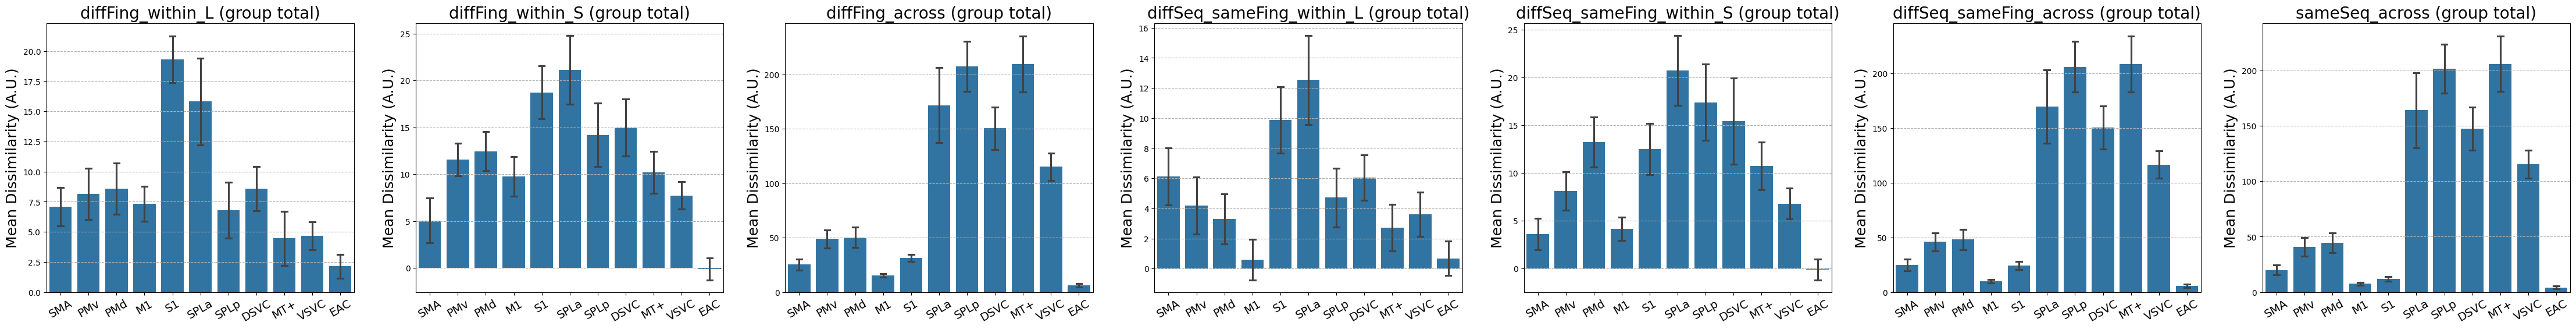

In [18]:
ncols = len(list_diss)
nrows = 1
# fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8*ncols,6*nrows))
for gg, group in enumerate(['S','R','total']):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8*ncols,6*nrows))
    for ii, diss in enumerate(list_diss):
        # ax = axs[gg,ii]
        ax = axs[ii]
        plt.sca(ax)

        if not group == 'total':
            df_tmp = df[(df.group==group)&(df.diss==diss)]
        else:
            df_tmp = df[df.diss==diss]
            
        sns.barplot(
            data=df_tmp,
            x='roi', y='mean',
            capsize=0.2, errorbar='se'
        )
        plt.xticks(rotation=30, fontsize=14)
        plt.ylabel('Mean Dissimilarity (A.U.)', fontsize=18)
        plt.xlabel('')
        plt.title('%s (group %s)'%(diss,group), fontsize=20)
        plt.grid(axis='y', linestyle='--')
    fig.savefig(
        join(dir_work,'results/fig.barplot.glm3.rdm.%s.png'%group),
        dpi=300, facecolor=[1,1,1,1],
        bbox_inches = "tight"
    )

In [19]:
# fig.savefig(
#     join(dir_work,'results/fig.barplot.glm3.rdm.png'),
#     dpi=300, facecolor=[1,1,1,1],
#     bbox_inches = "tight"
# )

In [20]:
df_tmp.diss.unique()

array(['sameSeq_across'], dtype=object)

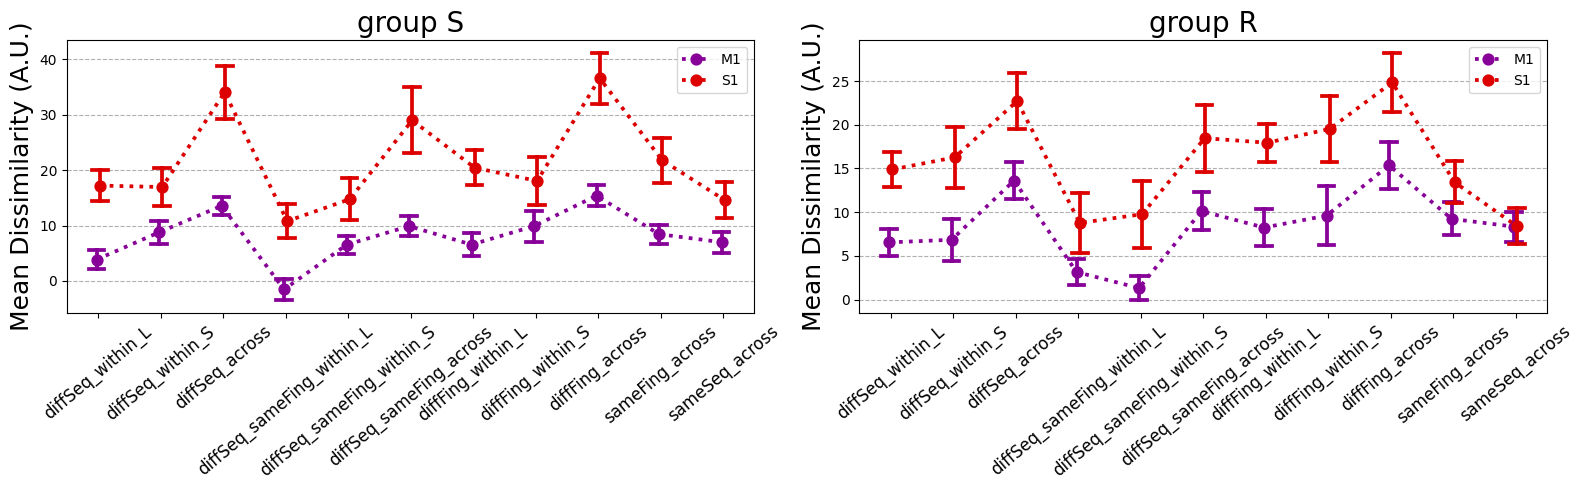

In [21]:
ncols = 2
fig, axs = plt.subplots(ncols=ncols, figsize=(8*ncols,5))

list_roi = ['M1', 'S1']
# list_roi = ['PMv', 'PMd', 'SPLa', 'SPLp']
# list_roi = ['M1', 'S1', 'PMv', 'PMd', 'SPLa', 'SPLp']
palette = [colors.to_hex(rgba) for rgba in cm.nipy_spectral(np.linspace(0.1,0.9,len(list_roi)))]

# order = df_tmp.diss.unique()
order = [
    'diffSeq_within_L','diffSeq_within_S','diffSeq_across',
    'diffSeq_sameFing_within_L', 'diffSeq_sameFing_within_S', 'diffSeq_sameFing_across',
    'diffFing_within_L', 'diffFing_within_S', 'diffFing_across',
    'sameFing_across', 'sameSeq_across'
]
for gg, group in enumerate(['S', 'R']):
    ax = axs[gg]
    plt.sca(ax)
    df_tmp = df[df.group==group]
    # df_tmp = df_tmp[(df_tmp.roi=='M1')|(df_tmp.roi=='S1')|(df_tmp.roi=='PMv')|(df_tmp.roi=='PMd')|(df_tmp.roi=='SPLa')|(df_tmp.roi=='SPLp')]
    df_tmp = df_tmp.loc[np.unique([df_tmp[df_tmp.roi==roi].index for roi in list_roi])]
    sns.pointplot(
        data=df_tmp,
        x='diss', y='mean', order=order,
        hue='roi', linestyles=':',
        capsize=0.25, errorbar='se', dodge=True,
        palette=palette,
    )
    plt.title('group %s'%group, fontsize=20)
    plt.xlabel('')
    plt.xticks(rotation=40, fontsize=12)
    plt.ylabel('Mean Dissimilarity (A.U.)', fontsize=18)
    plt.grid(axis='y', linestyle='--')
    plt.legend()

    ## t-test
    # dy = np.diff(ax.get_ylim())[0] * 0.05
    # cnt = np.zeros(len(order), dtype=int)
    # for rr, roi in enumerate(list_roi):
    #     print('%s: %s'%(group,roi))
    #     for xx, diss in enumerate(order):
    #         tmp = df_tmp[(df_tmp.roi==roi)&(df_tmp.diss==diss)]['mean']
    #         res = scipy.stats.ttest_1samp(tmp, popmean=0)
    #         print('%s: t(%d)=%.5f (%sp=%.5f)'%(diss, res.df, res.statistic, convert_pvalue_to_asterisks(res.pvalue), res.pvalue))
    #         x = xx
    #         y = tmp.mean() + tmp.sem() + dy*(cnt[xx]+1)
    #         if res.pvalue > 0.05:
    #             plt.text(
    #                 x=x, y=y,
    #                 s=convert_pvalue_to_asterisks(res.pvalue),
    #                 color=palette[rr], fontweight='bold',
    #                 ha='center', va='center',
    #             )
    #             cnt[xx] += 1
    #     print('')
        

fig.tight_layout()

In [22]:
fig.savefig(
    join(dir_work,'results/fig.pointplot.glm3.rdm.m1s1.png'),
    dpi=300, facecolor=[1,1,1,1],
    bbox_inches = "tight"
)

---